In [1]:
import os
import json

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from phasepack import phasecong
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from torch.utils.data import ConcatDataset, DataLoader, Subset

from src.dataset_benchm import MATTEO, OVAS, SAMSU
from src.train import eval_loop
from datetime import datetime

ModuleNotFoundError: No module named 'src'

In [ ]:
all_ds = []

ALGO = 'phasecong'
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
CSV_FILE = f'CV_outputs_2/grid_metrics_{ALGO}_{timestamp}.csv'

print(ALGO)
print(timestamp)

EXPAND, DILATE = True, True
for ds in [OVAS]:
    trainset_ = ds(subset='test', expand=EXPAND, dilate=DILATE)
    all_ds.append(trainset_)

    # valset_ = ds(subset='valid', expand=EXPAND, dilate=DILATE)
    # all_ds.append(valset_)

    # testset_ = ds(subset='test', expand=EXPAND, dilate=DILATE)
    # all_ds.append(testset_)

all_ds = ConcatDataset(all_ds)
# all_ds = Subset(all_ds, np.arange(1500))
print('Data loaded')

In [ ]:
import matplotlib.pyplot as plt

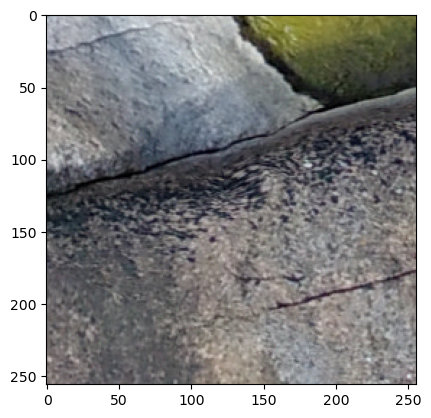

In [211]:
plt.imshow(all_ds[99][0].permute(1, 2, 0)[:,:,:3]/255)

In [34]:
import torchvision.transforms.v2 as t

In [233]:
import torchvision.transforms.v2.functional as TF

In [238]:
all_ds[99][0][:3].max(), out.max(), all_ds[99][0][:3].shape

(tensor(246.), tensor(1.), torch.Size([3, 256, 256]))

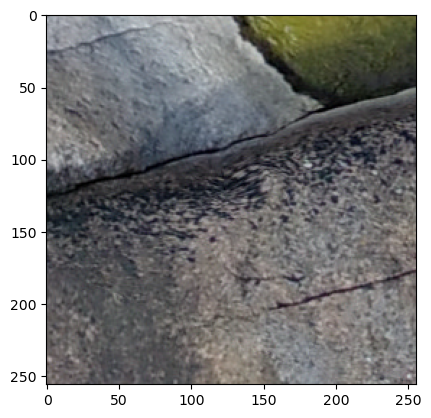

In [327]:
out = TF.adjust_brightness(all_ds[99][0][:3]/255, 0.9)

plt.imshow(out.permute(1, 2, 0)[:,:,:3], cmap='gray')

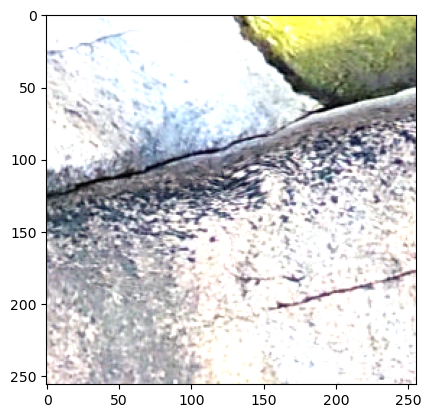

In [314]:
out, outm = t.ColorJitter(brightness=1.1)(
    all_ds[99][0][:3]/255,
    all_ds[99][1]/255
)

plt.imshow(out.permute(1, 2, 0)[:,:,:3])

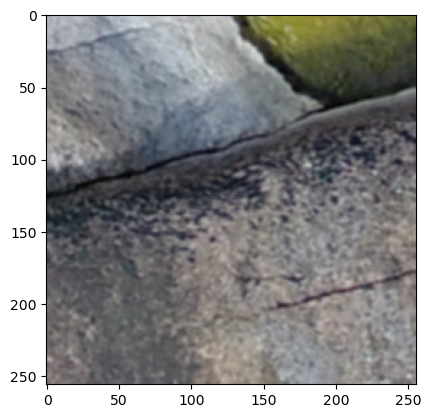

In [188]:
out, outm = t.GaussianBlur(kernel_size=3, sigma=15)(
    all_ds[99][0],
    all_ds[99][1]
)

plt.imshow(out.permute(1, 2, 0)[:,:,:3]/255)

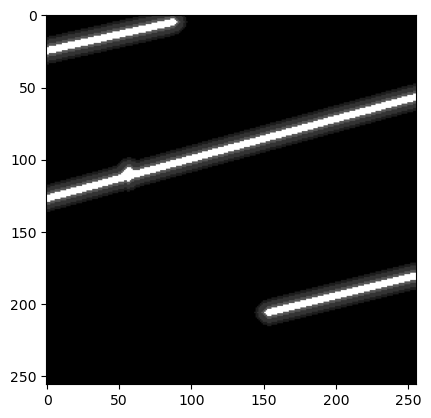

In [316]:
plt.imshow(outm.permute(1, 2, 0)[:,:,:3], cmap='gray')

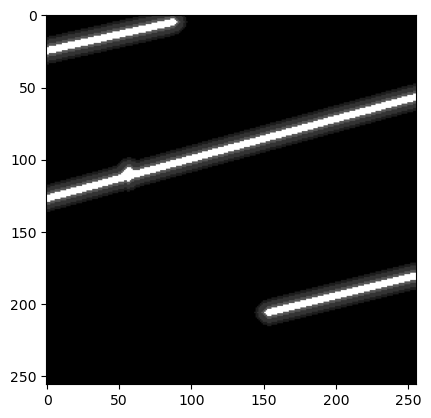

In [317]:
plt.imshow(all_ds[99][1].permute(1, 2, 0)[:,:,:3]/255., cmap='gray')

In [22]:
out.shape

torch.Size([4, 169, 169])